In [35]:
import numpy as np
import scipy.stats as ss
import random

## Task 1

In [30]:
def exact(q: int, n: int) -> (np.float64, np.float64):
    mu = 1 / q
    
    # после упрощения выражения L мы получим: L: (1/n) * sum(X_i) > mu + 2 * sigma / sqrt(n) => sum(X_i) > n * mu + 2 * sqrt(n) * sigma
    L_calculation = n * mu + (2 * np.sqrt(n))/q
    # после упрощения выражения R мы получим: L: (1/n) * sum(X_i) < mu - 2 * sigma / sqrt(n) => sum(X_i) < n * mu - 2 * sqrt(n) * sigma
    R_calculation = n * mu - (2 * np.sqrt(n))/q

    L_proba = 1 - ss.gamma.cdf(L_calculation, a=n, scale=1/q)
    R_proba = ss.gamma.cdf(R_calculation, a=n, scale=1/q)
    
    return L_proba, R_proba

In [31]:
exact(2, 10)

(0.03685411175968156, 0.004634706298986589)

## Task 2

In [32]:
def experiment():
    alpha = 1/20
    for i in range(10000):
        client_distribution = random.expovariate(alpha)

In [33]:
def closing_time(outcome):
    pass

In [34]:
def monte_carlo(experiment,
                closing_time,
                number_of_trials: int):
    return None

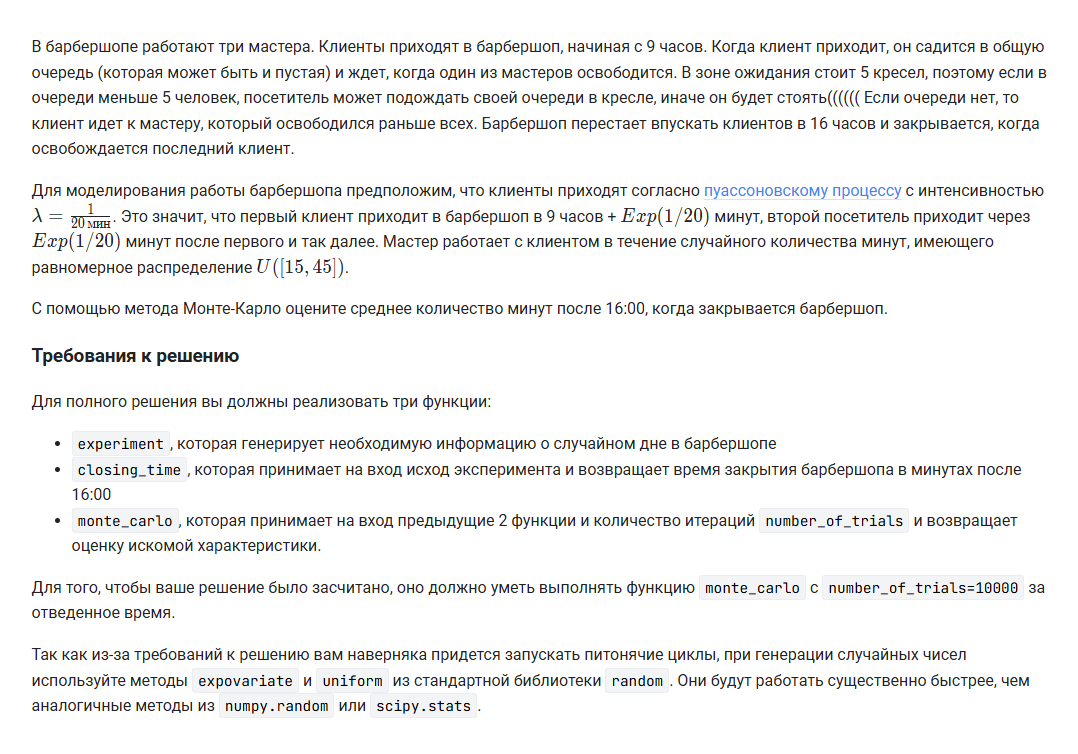

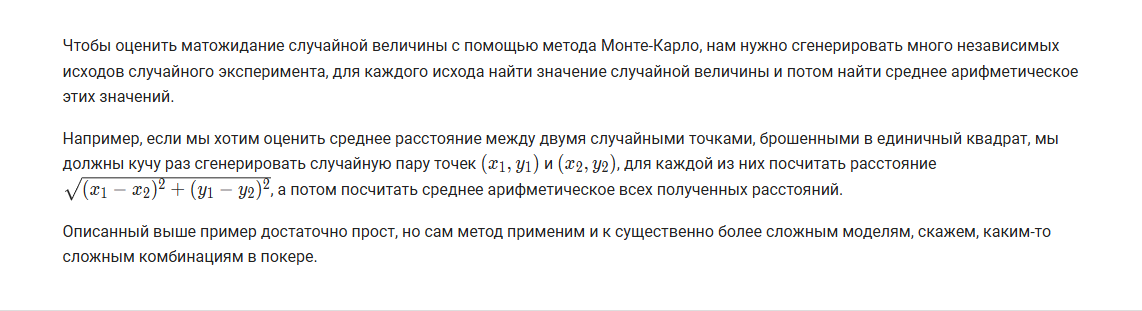